# Lab - Week2

## Questions:

1. When do the first and last flights leave each day?

1. When there is a missing value in dep_time then this is an indication of canceled flight. Find the number of cancelled flights for each (carrier, origin) combination.

1. Which carrier has the worst dep_delays?

1. Which plane (tailnum) has the worst on-time record?

1. For each plane, count the number of flights before the first delay of greater than 1 hour.

1. By using the flights data find all flights:

1. Had an arrival delay of two or more hours.

1. Flew to Houston (IAH or HOU)

1. Were operated by American, Delta

1. How many values are missing in dep_time?

1. Sort flight to find fastest flight.

1. Which flights travelled the shortest?

1. Merge `flights` dataframe with `weather` dataframe and investigate if weather has any affect on delays

In [53]:
import pandas as pd

flights = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/nyc_flights.csv')

weather = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/relational_data/nyc_weather.csv')

# example merge:
# flights.merge(weather, on= ['year', 'month', 'day', 'hour', 'origin'])

In [54]:
df = flights.merge(weather, on= ['year', 'month', 'day', 'hour', 'origin'])

In [55]:
flights.sample(10)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
157232,2013,3,23,1339.0,1345,-6.0,1647.0,1705,-18.0,AA,1073,N3AMAA,LGA,MIA,149.0,1096,13,45,2013-03-23T17:00:00Z
43269,2013,10,18,1026.0,1030,-4.0,1330.0,1326,4.0,UA,1025,N16701,LGA,IAH,208.0,1416,10,30,2013-10-18T14:00:00Z
315944,2013,9,8,1610.0,1605,5.0,1803.0,1806,-3.0,EV,4576,N12136,EWR,GRR,89.0,605,16,5,2013-09-08T20:00:00Z
305323,2013,8,27,1701.0,1659,2.0,1931.0,2006,-35.0,UA,1078,N14228,EWR,SAT,189.0,1569,16,59,2013-08-27T20:00:00Z
89631,2013,12,7,1900.0,1900,0.0,2037.0,2044,-7.0,9E,2943,N8891A,JFK,RIC,61.0,288,19,0,2013-12-08T00:00:00Z
2461,2013,1,3,1755.0,1745,10.0,2110.0,2117,-7.0,DL,1394,N399DA,JFK,PDX,325.0,2454,17,45,2013-01-03T22:00:00Z
50239,2013,10,25,1822.0,1825,-3.0,2033.0,2042,-9.0,DL,2002,N997DL,JFK,DTW,87.0,509,18,25,2013-10-25T22:00:00Z
42855,2013,10,17,2008.0,1950,18.0,2216.0,2140,36.0,MQ,3573,N724MQ,LGA,CMH,85.0,479,19,50,2013-10-17T23:00:00Z
63916,2013,11,9,1656.0,1700,-4.0,1955.0,2035,-40.0,UA,512,N590UA,JFK,SFO,337.0,2586,17,0,2013-11-09T22:00:00Z
278170,2013,7,30,957.0,1000,-3.0,1128.0,1133,-5.0,UA,673,N836UA,LGA,ORD,105.0,733,10,0,2013-07-30T14:00:00Z


In [77]:
weather.sample(5)

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
6904,EWR,2013,10,16,6,55.94,51.08,83.69,20.0,5.75390,NaN,0.0,1018.9,10.0,2013-10-16T10:00:00Z
4714,EWR,2013,7,16,18,91.04,64.04,40.90,20.0,10.35702,NaN,0.0,1020.1,10.0,2013-07-16T22:00:00Z
12263,JFK,2013,5,29,14,69.98,62.96,78.41,160.0,8.05546,NaN,0.0,1018.6,8.0,2013-05-29T18:00:00Z
6793,EWR,2013,10,11,15,66.92,57.92,72.81,40.0,16.11092,25.31716,0.0,NaN,10.0,2013-10-11T19:00:00Z
22601,LGA,2013,8,5,15,78.08,42.98,28.68,320.0,9.20624,NaN,0.0,1015.7,10.0,2013-08-05T19:00:00Z


In [56]:
flights.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour'],
      dtype='object')

In [57]:
# When do the first and last flights leave each day?
# extracting hour and minute from dep_time and then combining it into one string

flights['dep_time'] = flights['dep_time'].astype(str)

flights['hour'] = flights['dep_time'].str[:2]
flights['minute'] = flights['dep_time'].str[2:4]

flights['dep_time'] = flights['hour'] + ':' + flights['minute']

# converting the 'dep_time' column to datetime format
flights['dep_time'] = pd.to_datetime(flights['dep_time'], format='%H:%M', errors='coerce')

first_flight_times = flights.groupby(['year', 'month', 'day'])['dep_time'].min()
last_flight_times = flights.groupby(['year', 'month', 'day'])['dep_time'].max()

print('first flight departure times:', first_flight_times)
print('last flight departure times:', last_flight_times)

first flight departure times: year  month  day
2013  1      1     1900-01-01 10:03:00
             2     1900-01-01 10:00:00
             3     1900-01-01 10:00:00
             4     1900-01-01 10:00:00
             5     1900-01-01 10:00:00
                           ...        
      12     27    1900-01-01 10:02:00
             28    1900-01-01 10:01:00
             29    1900-01-01 10:00:00
             30    1900-01-01 10:00:00
             31    1900-01-01 10:01:00
Name: dep_time, Length: 365, dtype: datetime64[ns]
last flight departure times: year  month  day
2013  1      1     1900-01-01 23:56:00
             2     1900-01-01 23:54:00
             3     1900-01-01 23:49:00
             4     1900-01-01 23:58:00
             5     1900-01-01 23:57:00
                           ...        
      12     27    1900-01-01 23:51:00
             28    1900-01-01 23:58:00
             29    1900-01-01 23:59:00
             30    1900-01-01 23:56:00
             31    1900-01-01 23:56:0

In [58]:
# When there is a missing value in dep_time then this is an indication of canceled flight. Find the number of cancelled flights for each (carrier, origin) combination.

cancelled_flights = flights[flights['dep_time'].isnull()]

# grouping the cancelled flights by 'carrier' and 'origin' then counting the number of cancelled flights in each group
cancelled_flights_count = cancelled_flights.groupby(['carrier', 'origin']).size().reset_index(name='cancelled_flights_count')

print(cancelled_flights_count)

   carrier origin  cancelled_flights_count
0       9E    EWR                      398
1       9E    JFK                     3863
2       9E    LGA                      987
3       AA    EWR                     1083
4       AA    JFK                     4377
5       AA    LGA                     5524
6       AS    EWR                      349
7       B6    EWR                     2317
8       B6    JFK                    13176
9       B6    LGA                     2251
10      DL    EWR                     1376
11      DL    JFK                     5733
12      DL    LGA                     7115
13      EV    EWR                    14216
14      EV    JFK                      572
15      EV    LGA                     2462
16      F9    LGA                      176
17      FL    LGA                      859
18      HA    JFK                      288
19      MQ    EWR                      672
20      MQ    JFK                     1155
21      MQ    LGA                     4928
22      OO 

In [59]:
# Which carrier has the worst dep_delays?

avg_delay = flights.groupby('carrier')['dep_delay'].mean()

worst_carrier = avg_delay.idxmax()
worst_delay = avg_delay.max()

print(worst_carrier, worst_delay)

F9 20.215542521994134


In [60]:
# Which plane (tailnum) has the worst on-time record?

avg_delay_tailnum = flights.groupby('tailnum')['arr_delay'].mean()

worst_carrier_tailnum = avg_delay_tailnum.idxmax()
worst_delay_tailnum = avg_delay_tailnum.max()

print(worst_carrier_tailnum, worst_delay_tailnum)

N844MH 320.0


In [61]:
# For each plane, count the number of flights before the first delay of greater than 1 hour.

flights_sorted = flights.sort_values(by=['tailnum', 'sched_dep_time'])

# grouping the flights df by plane (tailnum)
grouped = flights_sorted.groupby('tailnum')

# function to count the number of flights before the first delay of greater than 1 hour
def count_flights_before_delay(group):
    count = 0
    cumulative_delay = 0
    for index, row in group.iterrows():
        cumulative_delay += row['dep_delay']
        if cumulative_delay > 60:
            break
        count += 1
    return count

flights_before_delay_counts = grouped.apply(count_flights_before_delay).reset_index(name='flights_before_delay_count')

print(flights_before_delay_counts)

     tailnum  flights_before_delay_count
0     D942DN                           3
1     N0EGMQ                         371
2     N10156                           6
3     N102UW                          21
4     N103US                          46
...      ...                         ...
4038  N997DL                          63
4039  N998AT                          26
4040  N998DL                           1
4041  N999DN                           2
4042  N9EAMQ                           3

[4043 rows x 2 columns]


In [76]:
# Had an arrival delay of two or more hours.

delayed_flights = df[df['arr_delay'] > 0]

# filtering flights with arrival delays more than or equal to 2 hours
more_than_2_hours_delay = delayed_flights[delayed_flights['arr_delay'] >= 120]
print(more_than_2_hours_delay)

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
22      2013      1    1     811.0             630      181.0    1047.0   
106     2013      1    1     957.0             733      224.0    1056.0   
165     2013      1    1     848.0            1835     -987.0    1001.0   
227     2013      1    1    1114.0             900      214.0    1447.0   
379     2013      1    1    1505.0            1310      195.0    1638.0   
...      ...    ...  ...       ...             ...        ...       ...   
334870  2013      9   30    1823.0            1545      278.0    1934.0   
334934  2013      9   30    1951.0            1649      302.0    2157.0   
335048  2013      9   30    2159.0            1845      314.0    2344.0   
335065  2013      9   30    2053.0            1815      238.0    2310.0   
335183  2013      9   30    2235.0            2001      234.0      59.0   

        sched_arr_time  arr_delay carrier  ...   temp   dewp  humid wind_dir  \
22                 

In [63]:
distinct_values = df['dest'].unique()
print(distinct_values)

['IAH' 'ORD' 'MIA' 'BQN' 'BOS' 'ATL' 'IAD' 'DFW' 'FLL' 'MSP' 'DTW' 'BWI'
 'MCO' 'DEN' 'CLT' 'SFO' 'LAS' 'PBI' 'PHX' 'LAX' 'SNA' 'TPA' 'RSW' 'SJU'
 'BUF' 'MSY' 'SLC' 'XNA' 'MKE' 'ROC' 'SYR' 'SRQ' 'SEA' 'JAX' 'CHS' 'MEM'
 'MYR' 'JAC' 'RDU' 'SAN' 'MDW' 'PIT' 'DCA' 'STT' 'CMH' 'CLE' 'STL' 'BNA'
 'LGB' 'SJC' 'OAK' 'SMF' 'BUR' 'HNL' 'AUS' 'BTV' 'PWM' 'PHL' 'EGE' 'AVL'
 'SAV' 'IND' 'CAK' 'HOU' 'ALB' 'BDL' 'MHT' 'MSN' 'GSO' 'CVG' 'RIC' 'OMA'
 'GSP' 'MCI' 'GRR' 'SDF' 'DAY' 'ORF' 'PDX' 'SAT' 'CRW' 'TUL' 'TYS' 'OKC'
 'DSM' 'PVD' 'PSE' 'BHM' 'CAE' 'HDN' 'BZN' 'MTJ' 'EYW' 'PSP' 'BGR' 'ACK'
 'ABQ' 'ILM' 'MVY' 'SBN' 'LEX' 'CHO' 'TVC' 'ANC' 'LGA']


In [64]:
# Flew to Houston (IAH or HOU)

flew_to_houston=df[df['dest'].str.contains('IAH|HOU')]
print(flew_to_houston)

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0       2013      1    1     517.0             515        2.0     830.0   
2       2013      1    1     533.0             529        4.0     850.0   
15      2013      1    1     623.0             627       -4.0     933.0   
69      2013      1    1     728.0             732       -4.0    1041.0   
103     2013      1    1     739.0             739        0.0    1104.0   
...      ...    ...  ...       ...             ...        ...       ...   
334993  2013      9   30    1729.0            1720        9.0    2001.0   
334995  2013      9   30    1735.0            1715       20.0    2010.0   
335019  2013      9   30    1859.0            1859        0.0    2134.0   
335147  2013      9   30    2015.0            2015        0.0    2244.0   
335196  2013      9   30    2105.0            2106       -1.0    2329.0   

        sched_arr_time  arr_delay carrier  ...   temp   dewp  humid wind_dir  \
0                  

In [65]:
distinct_values = df['carrier'].unique()
print(distinct_values)

['UA' 'AA' 'B6' 'DL' 'EV' 'MQ' 'WN' 'US' 'FL' 'VX' 'AS' '9E' 'F9' 'HA'
 'YV' 'OO']


In [79]:
# Were operated by American, Delta

operated_american_or_delta = df[df['carrier'].str.contains('DL|AA')]
print(operated_american_or_delta)

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
3       2013      1    1     542.0             540        2.0     923.0   
6       2013      1    1     554.0             600      -46.0     812.0   
8       2013      1    1     558.0             600      -42.0     753.0   
9       2013      1    1     559.0             600      -41.0     941.0   
12      2013      1    1     602.0             610       -8.0     812.0   
...      ...    ...  ...       ...             ...        ...       ...   
335173  2013      9   30    2022.0            2025       -3.0    2127.0   
335177  2013      9   30    2041.0            2045       -4.0    2147.0   
335178  2013      9   30    2050.0            2045        5.0      20.0   
335206  2013      9   30    2121.0            2100       21.0    2349.0   
335209  2013      9   30    2140.0            2140        0.0      10.0   

        sched_arr_time  arr_delay carrier  ...   temp   dewp  humid wind_dir  \
3                  

In [66]:
# How many values are missing in dep_time?

missing_values = df['dep_time'].isnull().sum()
print(missing_values)

8227


In [67]:
# Sort flight to find fastest flight.

df['dep_delay'] = df['dep_time'] - df['sched_dep_time']
fastest_flight = df.sort_values(by='dep_delay').iloc[2]
print(fastest_flight)

year                              2013
month                                4
day                                  5
dep_time                           1.0
sched_dep_time                    2359
dep_delay                      -2358.0
arr_time                         410.0
sched_arr_time                     339
arr_delay                         31.0
carrier                             B6
flight                             727
tailnum                         N606JB
origin                             JFK
dest                               BQN
air_time                         228.0
distance                          1576
hour                                23
minute                              59
time_hour_x       2013-04-06T03:00:00Z
temp                             42.98
dewp                             15.98
humid                            33.21
wind_dir                         340.0
wind_speed                    19.56326
wind_gust                          NaN
precip                   

In [68]:
# Which flights travelled the shortest?

shortest_flight = df.sort_values(by='distance').head(1)
print(shortest_flight)

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
274616  2013      7   27       NaN             106        NaN       NaN   

        sched_arr_time  arr_delay carrier  ...   temp   dewp  humid wind_dir  \
274616             245        NaN      US  ...  69.08  64.94  86.66    200.0   

        wind_speed  wind_gust  precip  pressure visib           time_hour_y  
274616     8.05546        NaN     0.0    1017.4  10.0  2013-07-27T05:00:00Z  

[1 rows x 29 columns]


In [71]:
df.sample(20)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour_y
27988,2013,10,2,622.0,630,-8.0,926.0,922,4.0,UA,...,62.06,57.02,83.54,260.0,8.05546,NaN,0.00,1015.1,10.0,2013-10-02T10:00:00Z
76639,2013,11,23,1624.0,1630,-6.0,1936.0,1943,-7.0,UA,...,42.98,17.96,36.18,260.0,16.11092,25.31716,0.00,1013.4,10.0,2013-11-23T21:00:00Z
93034,2013,12,11,1928.0,1930,-2.0,2210.0,2157,13.0,DL,...,28.94,17.06,60.69,240.0,12.65858,NaN,0.00,1023.9,10.0,2013-12-12T00:00:00Z
75003,2013,11,21,1944.0,1945,-1.0,2115.0,2130,-15.0,MQ,...,51.80,41.00,68.28,160.0,6.90468,NaN,0.00,NaN,10.0,2013-11-22T00:00:00Z
296930,2013,8,20,1031.0,1029,2.0,1318.0,1320,-2.0,B6,...,82.04,62.06,50.84,310.0,8.05546,NaN,0.00,1020.5,9.0,2013-08-20T14:00:00Z
217643,2013,5,28,1637.0,1630,7.0,1854.0,1853,1.0,FL,...,57.20,53.96,89.48,70.0,10.35702,NaN,0.14,NaN,2.0,2013-05-28T20:00:00Z
196996,2013,5,6,1000.0,1003,-3.0,1145.0,1134,11.0,FL,...,53.96,44.06,69.08,50.0,10.35702,NaN,0.00,1024.9,10.0,2013-05-06T14:00:00Z
68846,2013,11,15,906.0,908,-2.0,1206.0,1204,2.0,B6,...,46.94,35.96,65.43,220.0,12.65858,NaN,0.00,1025.2,10.0,2013-11-15T14:00:00Z
260007,2013,7,12,1627.0,1550,77.0,1821.0,1749,32.0,9E,...,77.00,66.92,71.08,50.0,12.65858,NaN,0.00,1016.9,10.0,2013-07-12T19:00:00Z
65267,2013,11,11,1604.0,1559,45.0,1932.0,1732,120.0,UA,...,53.06,26.06,34.89,230.0,11.50780,NaN,0.00,1018.2,10.0,2013-11-11T20:00:00Z


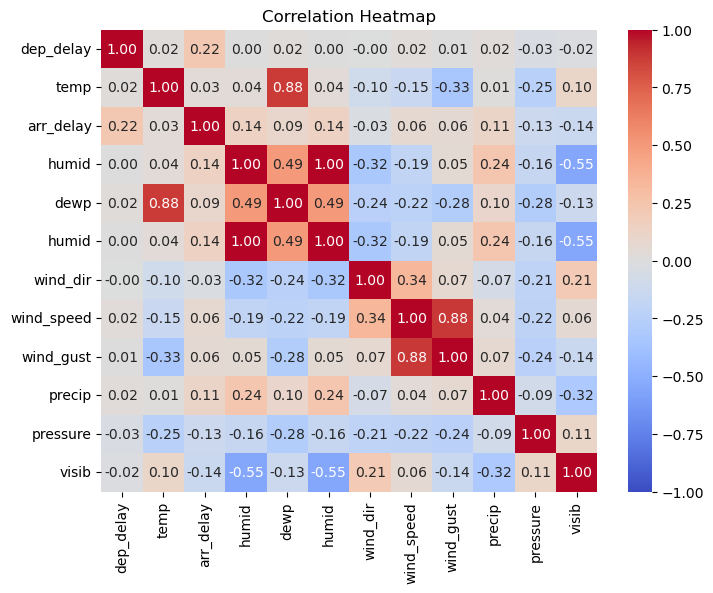

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Merge flights dataframe with weather dataframe and investigate if weather has any affect on delays
correlation_matrix = df[['dep_delay', 'temp', 'arr_delay', 'humid', 'dewp', 'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

There is no such correlation that can be seen between arr_delay/dep_delay with weather features. So we can say that weather has no such effect on flight delays